We use our model that we created in model.ipyng with user input.

In [5]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Fetch stock data
def get_stock_data(ticker, start="2020-01-01", end="2024-01-01"): #has default dates
    stock_data = yf.download(ticker, start=start, end=end)
    return stock_data

# Preprocess data
def prepare_data(df):
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    df = df.dropna()  # Remove missing values

    # Features (X) and Target (y)
    X = df[['Open', 'High', 'Low', 'Volume']]
    y = df['Close']

    return train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label="Actual Prices", color='blue')
    plt.plot(y_pred, label="Predicted Prices", color='red', linestyle='dashed')
    plt.legend()
    plt.title("Actual vs Predicted Stock Prices")
    plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Mean Absolute Error: 0.7048519446350566
Mean Squared Error: 0.9113176594251843
R2 Score: 0.9991804348872794


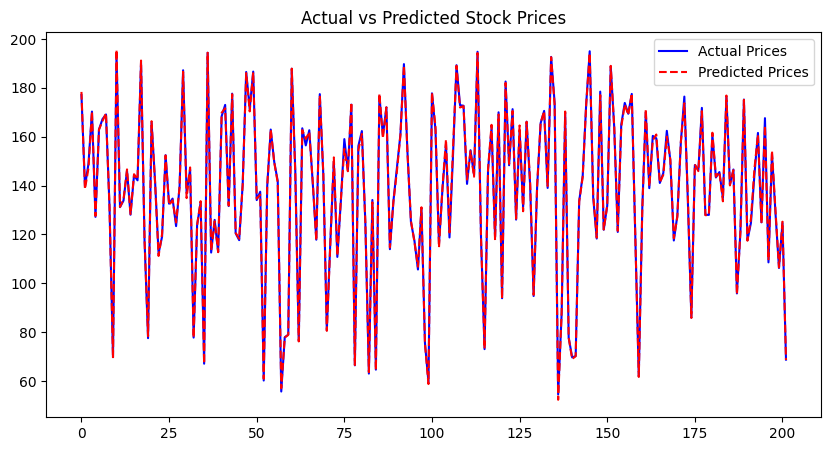

In [ ]:

# Get user input
ticker = input("Enter the stock symbol (e.g., AAPL): ")
start_date = input("Enter start date (YYYY-MM-DD) or press Enter to use default: ")
end_date = input("Enter end date (YYYY-MM-DD) or press Enter to use default: ")

# Use defaults if user presses Enter
if not start_date:
    start_date = "2023-01-01"
if not end_date:
    end_date = "2024-01-01"

# Fetch stock data
stock_data = get_stock_data(ticker, start_date, end_date)

if __name__ == "__main__":
    ticker = "AAPL"  # Change this to any stock symbol
    stock_data = get_stock_data(ticker)
    
    X_train, X_test, y_train, y_test = prepare_data(stock_data)
    
    model = train_model(X_train, y_train)
    
    evaluate_model(model, X_test, y_test)
